## Unsupervised learning project on Qualitative Bankruptcy dataset.

### 1. Read the dataset and understand the features and target variable.

In [326]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')

In [327]:
qb_df=pd.read_csv('Qualitative_Bankruptcy.data.txt',header=None,names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

## EDA

DATA SUMMARY:
This dataset contains 7 features of obejct data type and 250 rows of data. Negative type are dominant among all features except for 'Class' feature. Its a rules database and hence 147 records out of the total are duplicates. There are no nulls or missing values in this data.

In [328]:
qb_df.shape

(250, 7)

In [329]:
qb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [330]:
qb_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


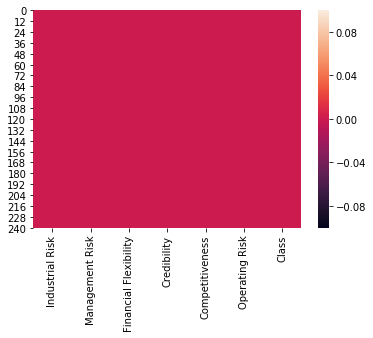

In [331]:
sns.heatmap(qb_df.isnull())

In [332]:
qb_df[qb_df.duplicated()]

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
15,N,N,A,P,A,N,NB
60,A,A,A,P,P,A,NB
65,A,A,N,P,P,P,NB
69,P,A,P,N,P,N,NB
71,P,P,A,P,P,P,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


### Understanding Features and Target variable.

In [333]:
qb_df.columns

Index(['Industrial Risk', 'Management Risk', 'Financial Flexibility',
       'Credibility', 'Competitiveness', 'Operating Risk', 'Class'],
      dtype='object')

#### Target Variable:Class

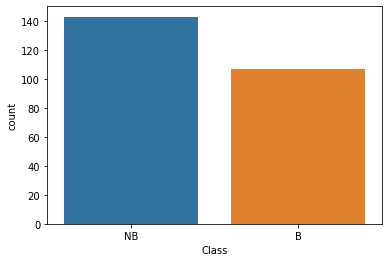

In [334]:
sns.countplot(qb_df['Class'])

In [335]:
qb_df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

The data is dominated by Non-Bankruptcy(NB) class than the Bankruptcy(B) class. The NB class representation in sample is 57% whereas the B class representation is 43%. Therefore, even though the data is not balanced, there is a good representation from both classes.

#### Feature Variable:Industrial Risk(IR)

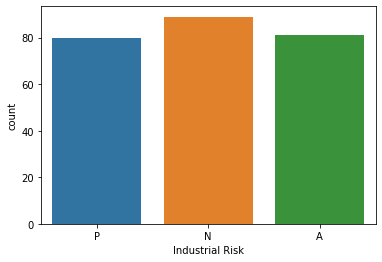

In [336]:
sns.countplot(qb_df['Industrial Risk'])

In [337]:
qb_df['Industrial Risk'].value_counts()

N    89
A    81
P    80
Name: Industrial Risk, dtype: int64

Industrial Risk(IR): Majority of the  IR are negatives and there are almost equal # of positives and averages

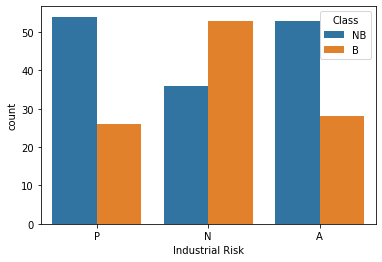

In [338]:
sns.countplot(qb_df['Industrial Risk'],hue=qb_df['Class'])

Majority of postives and average in IR have resulted in a NB class while majority of negative cases have resulted in B class.

#### Feature Variable:Management Risk(MR)

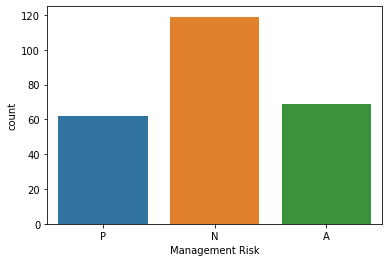

In [339]:
sns.countplot(qb_df['Management Risk'])

In [340]:
qb_df['Management Risk'].value_counts()

N    119
A     69
P     62
Name: Management Risk, dtype: int64

Clearly, the Management Risk(MR) data is dominated by negatives and there is almost equal number of positive and average.

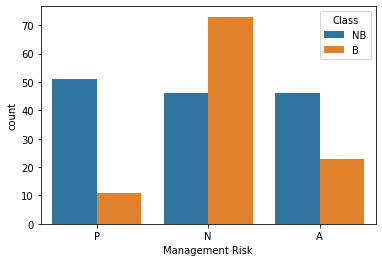

In [341]:
sns.countplot(qb_df['Management Risk'],hue=qb_df['Class'])

Majority of postives and average in MR have resulted in a NB class while majority of negative cases have resulted in B class.

#### Feature Variable:Financial Flexibility(FF)

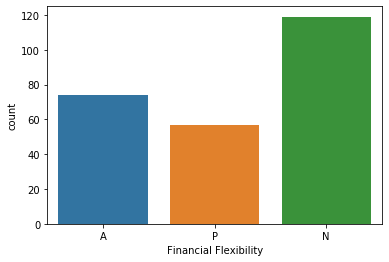

In [342]:
sns.countplot(qb_df['Financial Flexibility'])

In [343]:
qb_df['Financial Flexibility'].value_counts()

N    119
A     74
P     57
Name: Financial Flexibility, dtype: int64

The Financial Flexibility(FF) have majority data of negatives. The next highest is average and positives is the least.

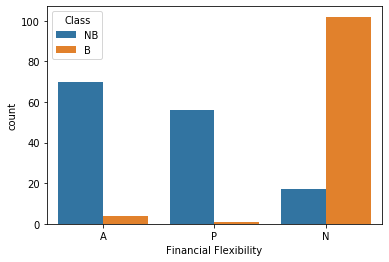

In [344]:
sns.countplot(qb_df['Financial Flexibility'],hue=qb_df['Class'])

Majority of negative cases in FF have resulted in B class whereas mojority of positive and average cases have resulted in NB class. The FF feature seems to be significant as there is not much overlap between the classes.

#### Feature Variable:Credibility(CR)

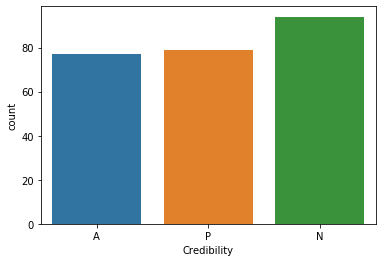

In [345]:
sns.countplot(qb_df['Credibility'])

In [346]:
qb_df['Credibility'].value_counts()

N    94
P    79
A    77
Name: Credibility, dtype: int64

Majority of the data in Credibility(CR) belong to negatives. There are almost equal number of Positives and Average.

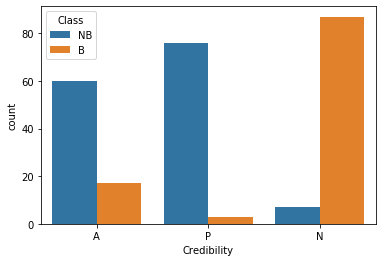

In [347]:
sns.countplot(qb_df['Credibility'],hue=qb_df['Class'])

The Majority of negatives in CR have resulted in B class whereas Average and Positives have resulted mostly in NB class. This feature could be a significant one.

#### Feature Variable:Competitiveness(CO)

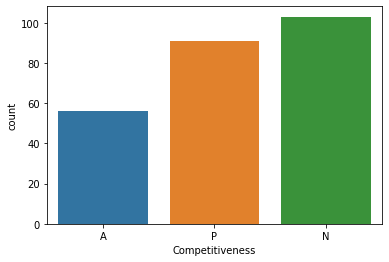

In [348]:
sns.countplot(qb_df['Competitiveness'])

In [349]:
qb_df['Competitiveness'].value_counts()

N    103
P     91
A     56
Name: Competitiveness, dtype: int64

The attribute Competitiveness(CO) is dominated by negative values with least # of values from Average.

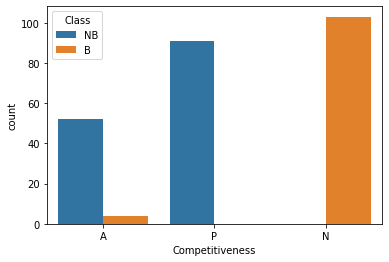

In [350]:
sns.countplot(qb_df['Competitiveness'],hue=qb_df['Class'])

All the negatives in CO have resulted in B class whereas, almost all of the Average and Positives have resulted in NB class.This seems to be a very significant feature as the demarcation is very clear among the classes.

#### Feature Variable:Operating Risk(OR)

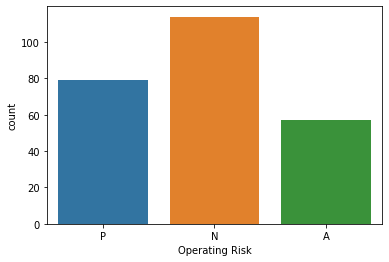

In [351]:
sns.countplot(qb_df['Operating Risk'])

In [352]:
qb_df['Operating Risk'].value_counts()

N    114
P     79
A     57
Name: Operating Risk, dtype: int64

The attribute Operating Risk(OR) seems to be dominated by negative values. Next highest are positives and the least being Average values.

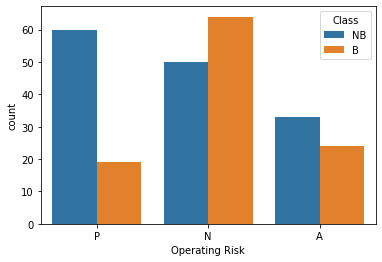

In [353]:
sns.countplot(qb_df['Operating Risk'],hue=qb_df['Class'])

Majority of the Negatives in OR have resulted in B class where as majority of positives and Averages have resulted in NB class.

### 2. Encode independent features.

## Encoding

In [354]:
from sklearn.preprocessing import OneHotEncoder

In [355]:
#Dropping the first record in the three encoded columns for each feature.
Encoder = OneHotEncoder(sparse=False,drop='first')

In [356]:
en_df=Encoder.fit_transform(qb_df)

In [357]:
en_df.shape

(250, 13)

### 3. Separate the dependant variable from the rest of the train data

In [358]:
Y=en_df[:,-1]

In [359]:
Y.shape

(250,)

In [360]:
X=en_df[:,:-1]

In [361]:
X.shape

(250, 12)

### 4. Split the dataset into training and test data ( Take 80:20 ratio).

## Spliting Data

In [362]:
from sklearn.model_selection import train_test_split

In [363]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

### 5. Apply PCA on the independent features of train data

## PCA

In [364]:
from sklearn.decomposition import PCA

#### Apply plain PCA and see the best # of PCAs that have greater than 95% of variance.

In [365]:
pca = PCA()

In [366]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 6.Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

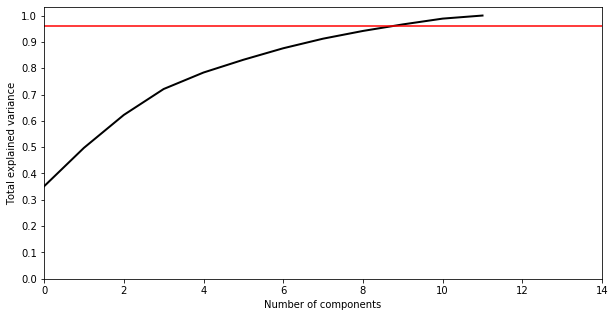

In [367]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 14)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.96, c='r')

plt.show()

#### The elbow indicates that the total # of PCA component are somewhere between 9 or 10. To get a clear pictures, lets apply PCA(n_components=0.96)

In [368]:
pca1=PCA(n_components=0.96)

In [369]:
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.96, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [370]:
pca1.components_

array([[-0.1752599 ,  0.11772329, -0.25305602,  0.18493661, -0.42599148,
         0.22791515, -0.39666998,  0.2988589 , -0.46329186,  0.33187381,
        -0.157149  ,  0.16623217],
       [ 0.47401182, -0.31500276,  0.30037248, -0.17266167, -0.21658762,
         0.18002989, -0.21157063,  0.12700832, -0.10593438,  0.18890376,
         0.43353044, -0.42541839],
       [ 0.3273625 , -0.30552704,  0.37556813, -0.25822849,  0.03685864,
        -0.05448022, -0.14484303,  0.1931092 , -0.02388004, -0.07433827,
        -0.58396381,  0.42666869],
       [ 0.30115146, -0.49470086, -0.50130885,  0.51229693,  0.10699575,
        -0.16951896, -0.13982826,  0.15859566,  0.13901423, -0.20072317,
         0.05210716,  0.06000785],
       [-0.41407764, -0.20904181, -0.03791335, -0.25869148,  0.2893051 ,
        -0.42259249, -0.02925829,  0.56200921, -0.06052467,  0.15302906,
        -0.03997439, -0.32986543],
       [ 0.02845943,  0.40949799,  0.33431572,  0.22125231, -0.04656379,
        -0.14327767, -

In [371]:
pca1.explained_variance_ratio_

array([0.35133532, 0.14607692, 0.1249614 , 0.09852153, 0.06264641,
       0.04843177, 0.04373591, 0.03641571, 0.02935245, 0.02484048])

#### Combining  both the approaches , the optimum # of PCS are 10 PCAs that preserve more than 95% of data variance.

### 7. Transform the data using PCA ( select optimum number of PCs)

It can be seen that both elbow plot and PCA functions converge  at 10 PCA components

In [372]:
pca2=PCA(n_components=10)

In [373]:
pca2.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [374]:
pca2.explained_variance_ratio_

array([0.35133532, 0.14607692, 0.1249614 , 0.09852153, 0.06264641,
       0.04843177, 0.04373591, 0.03641571, 0.02935245, 0.02484048])

In [375]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.35133532, 0.49741225, 0.62237365, 0.72089518, 0.78354158,
       0.83197335, 0.87570926, 0.91212497, 0.94147743, 0.96631791])

#### The total variance covered in these 10 PCA components is 97%.

#### Transform the train data using PCA.

In [376]:
X_train_pca=pca2.transform(X_train)
X_train_SVC=X_train_pca

In [377]:
X_train_pca.shape

(200, 10)

In [378]:
X_train

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [379]:
X_train_df=pd.DataFrame(X_train_pca)

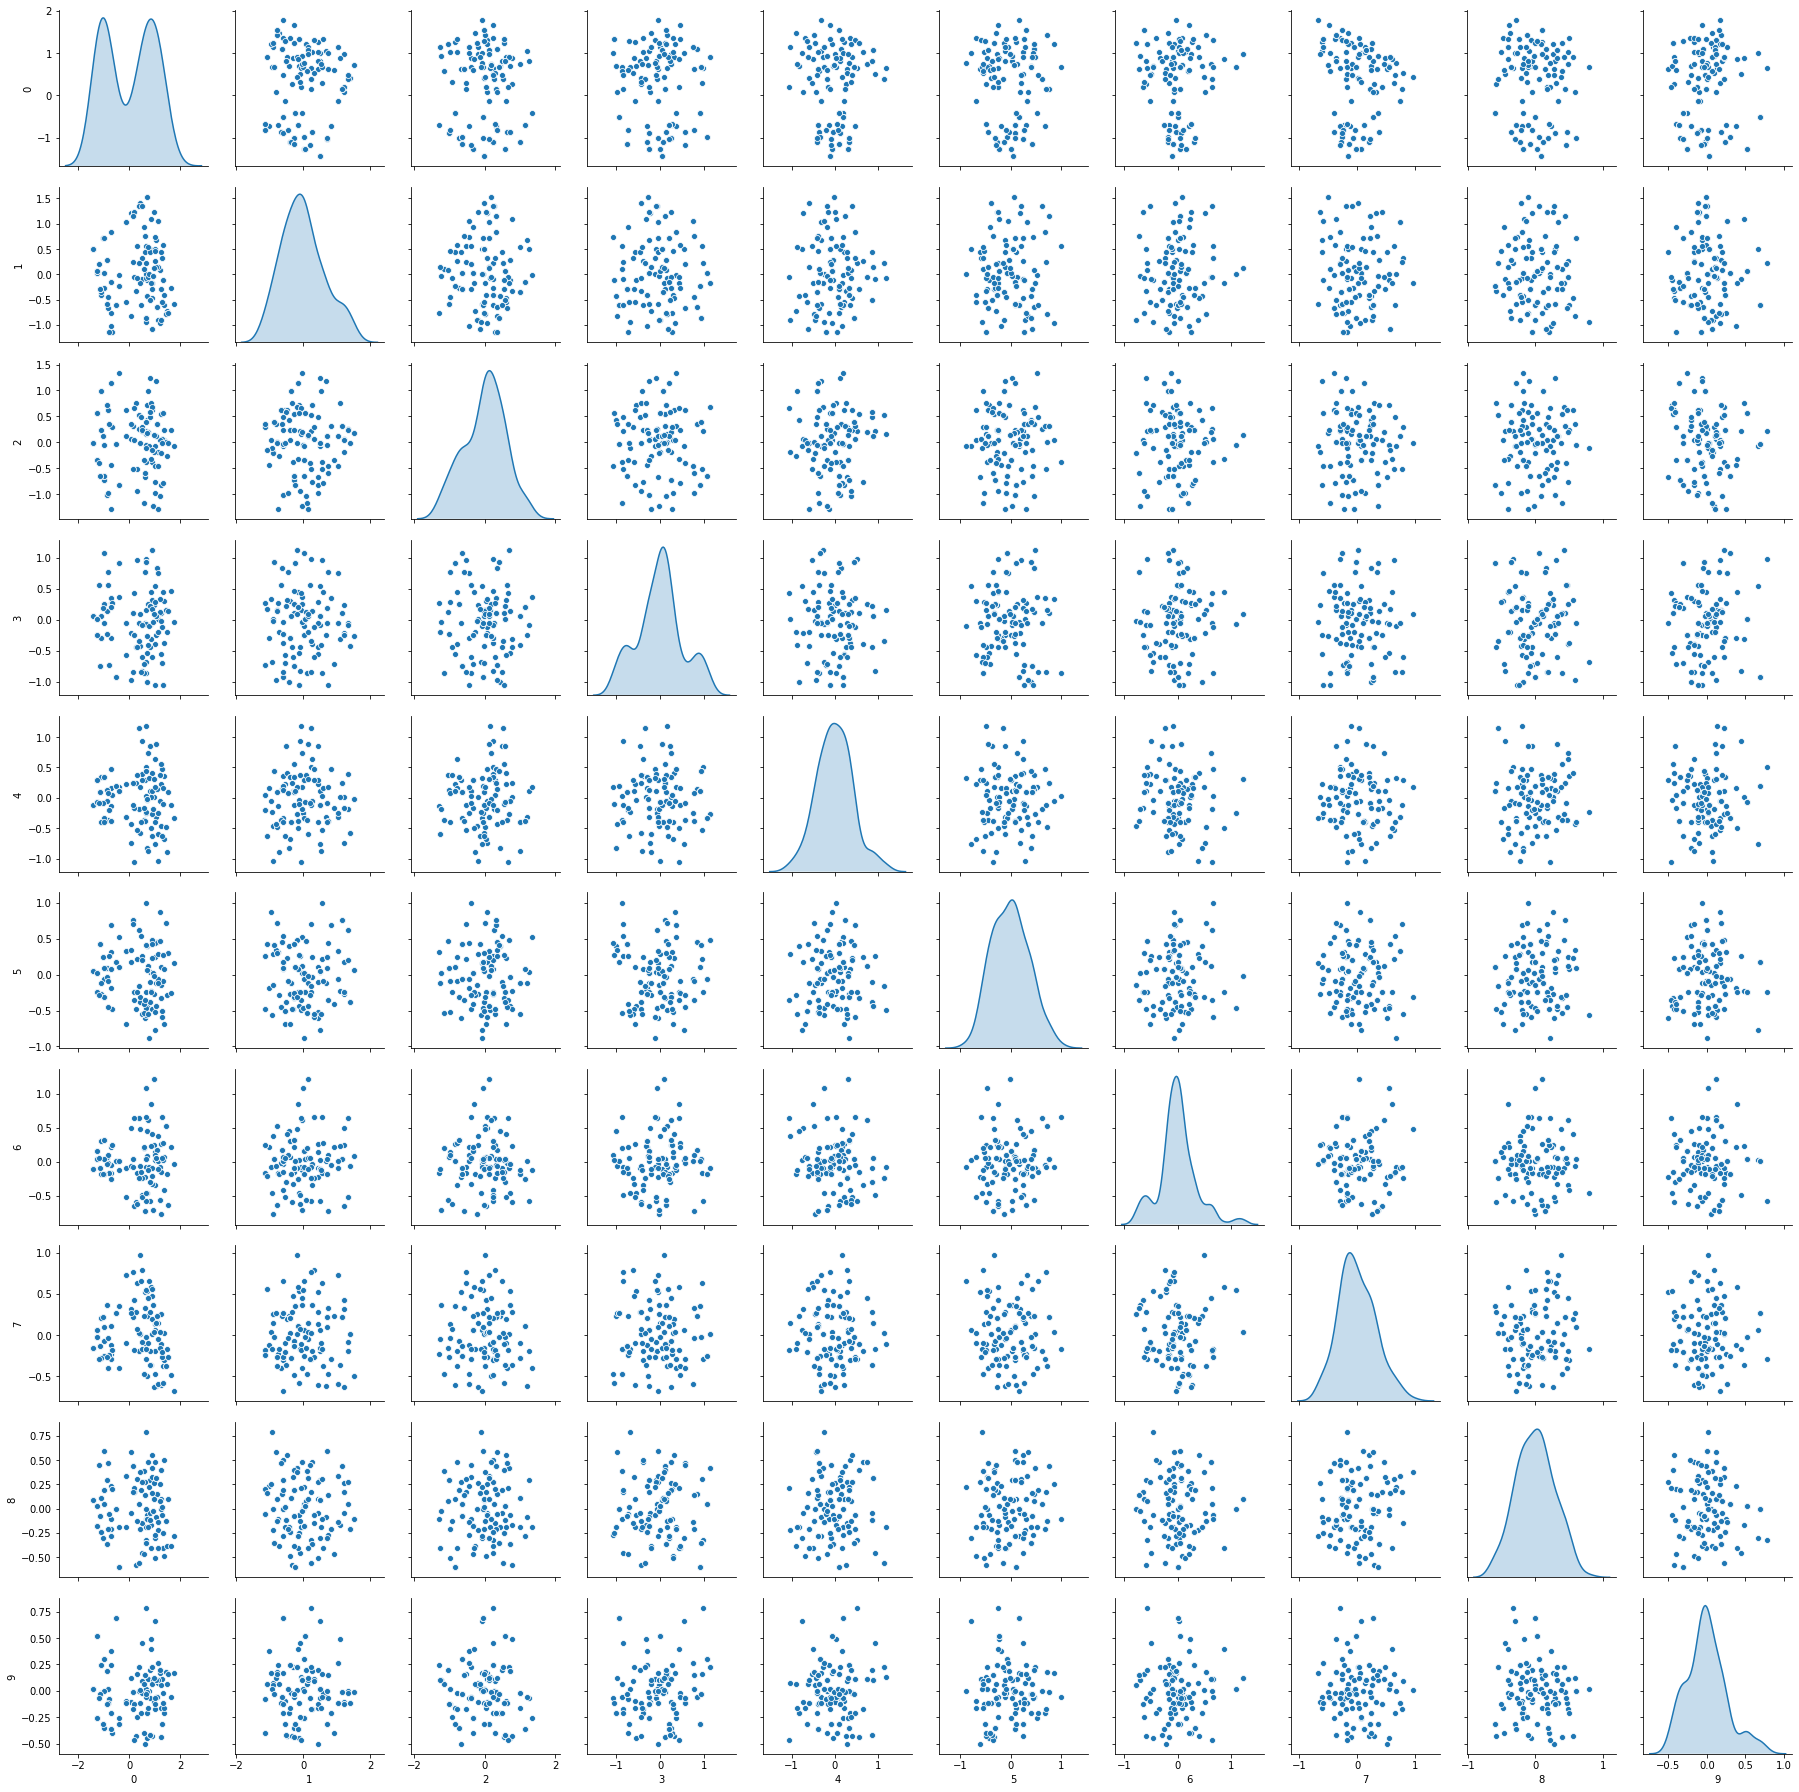

In [380]:
sns.pairplot(X_train_df,diag_kind='kde')

#### The pairplot shows that using the First Principal components itself, we can clearly see 2 clusters in the train data. Other dimensions shows overlapping clusters ranging from 3 to 4. By mere visaul data , there can be clusters ranging from 2 to 8. Applying K-means will conclude the exact number of clusters.

### 8. Apply KMeans algorithm on the above transformed data.

## K-means Clustering

In [381]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [382]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
cluster_range = range( 1, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 8
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,random_state=7)
  clusters.fit(X_train_pca)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:8]

,num_clusters,cluster_errors
0,1,521.207723
1,2,353.977918
2,3,309.734840
3,4,280.712814
4,5,262.186897
5,6,237.056509
6,7,216.272011


Looking at the cluster errors, there is a clear drop in the cluster errors from 1 to 2. We can visually see this through Elbow plot.

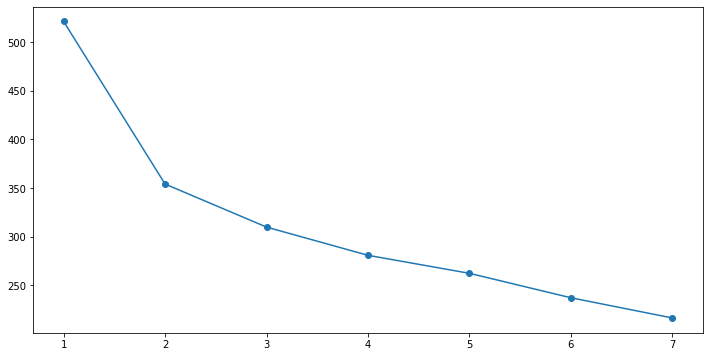

In [383]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### The Elbow plot also shows a steep decline at 2. Thereon, the decline is not very significant.

## Finding Clusters using K-Means and Silhouette Analysis

#### Since, the Eblow plot is not very conclusive, applying Silhouette Analysis will give a clear picture.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2974185846913511


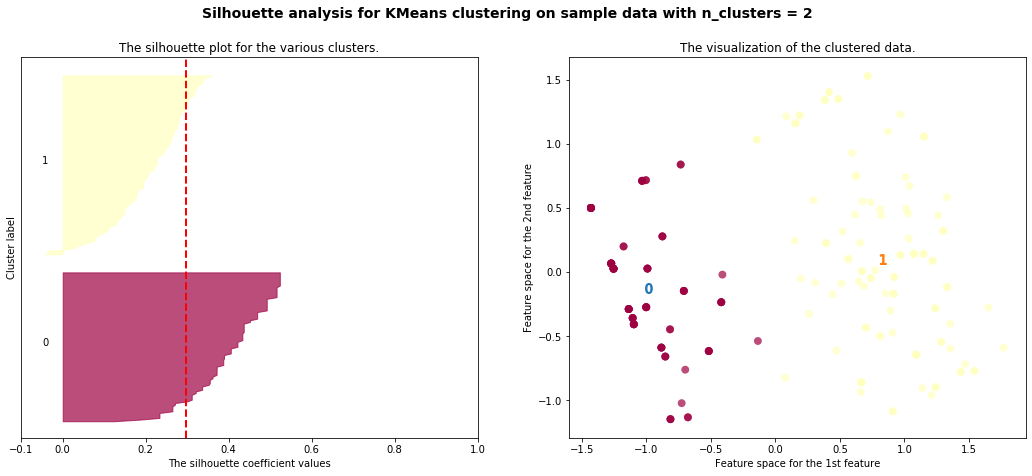

For n_clusters = 3 The average silhouette_score is : 0.26396069145275736


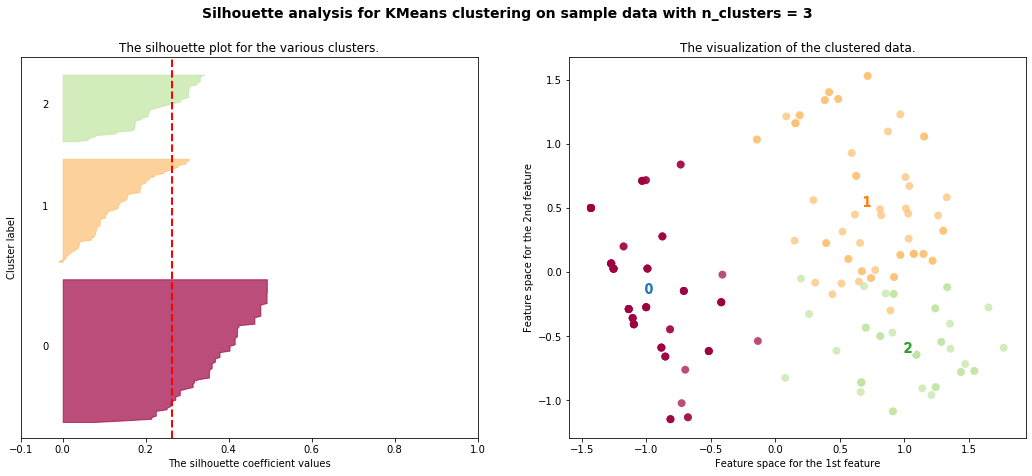

For n_clusters = 4 The average silhouette_score is : 0.19944057675105328


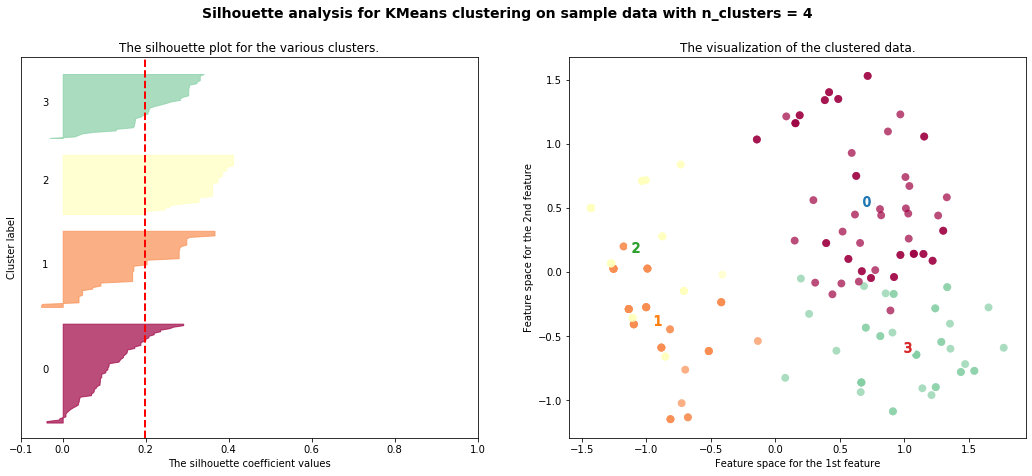

For n_clusters = 5 The average silhouette_score is : 0.21278593312771554


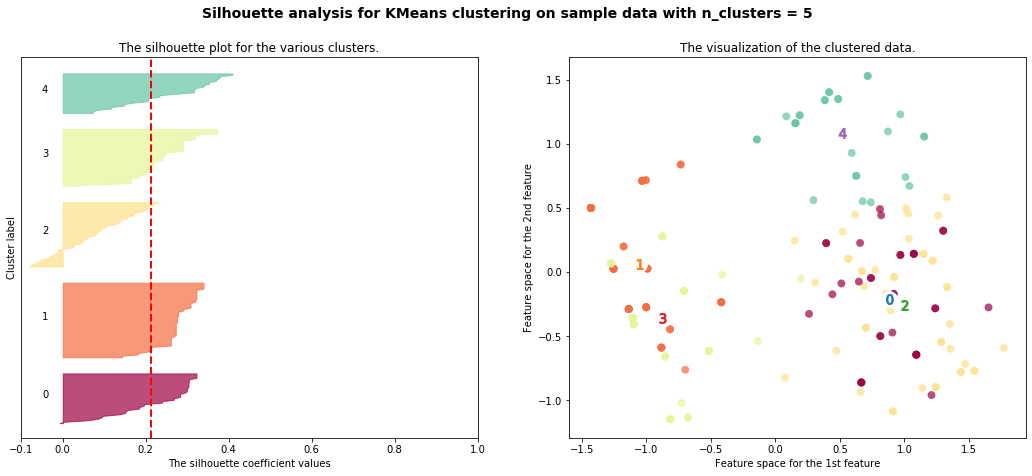

For n_clusters = 6 The average silhouette_score is : 0.22128530040492828


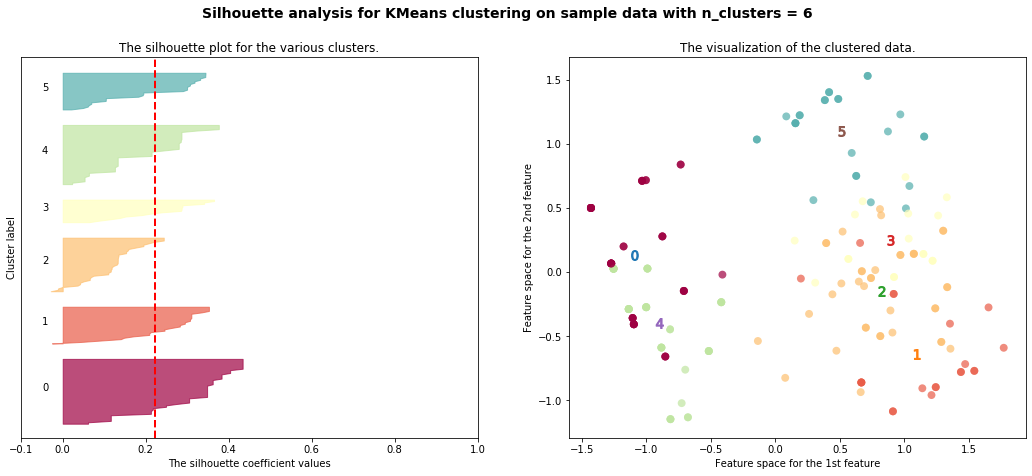

In [384]:
## from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train_pca

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=7)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--",linewidth=2)

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=250)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=100)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### The highest average silhouette_score is : 0.2974185846913511 for 2 clsuters.Cluters greater than 2 have uneven width. Therefore, 2 clusters is the most ideal.

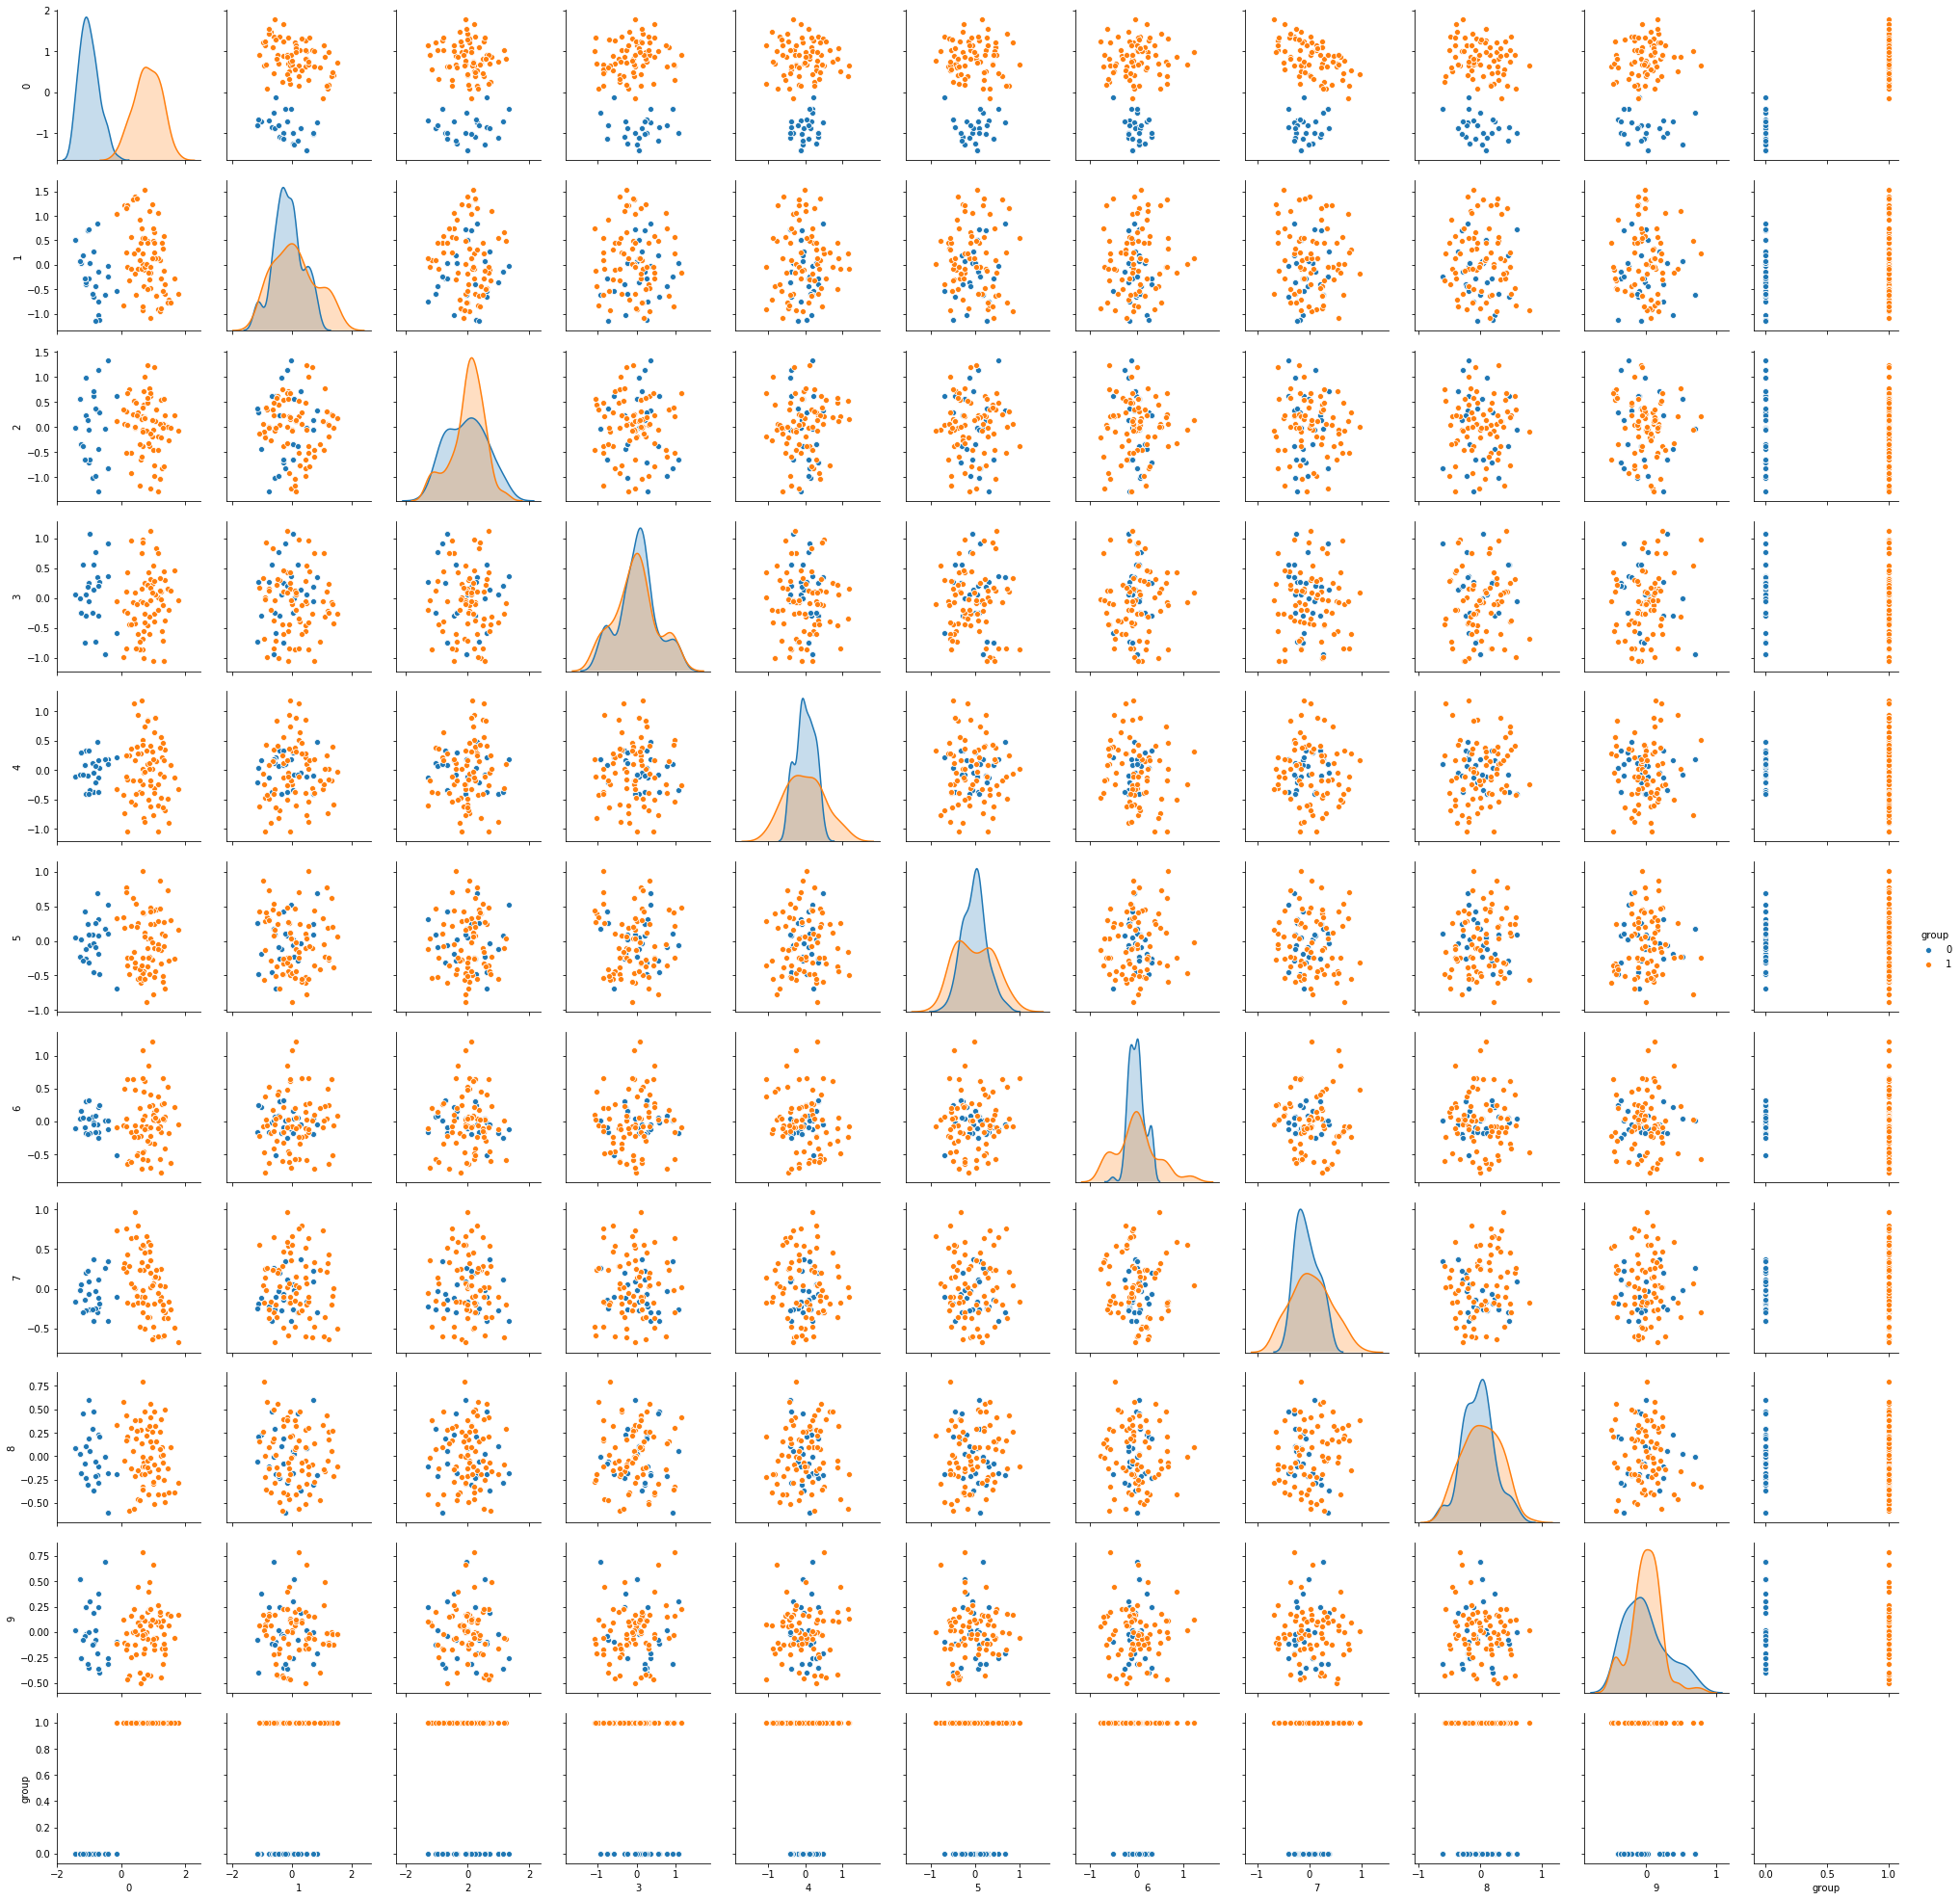

In [385]:
prediction= kmeans.predict(X_train_df)
X_train_df["group"] = prediction
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(X_train_df,diag_kind='kde',hue='group')

#### The pairplot also 2 distint clusters alonng the first dimension. 

### 9. Select optimal number of clusters and form clusters out of the train data. 

In [386]:
kmeans = KMeans(n_clusters=2,random_state=7)
kmeans = kmeans.fit(X_train_pca)
labels = kmeans.predict(X_train_pca)

centroids = kmeans.cluster_centers_
print("Centroid values")
print("sklearn")
print(centroids) 

Centroid values
sklearn
[[-9.91125405e-01 -1.24151146e-01 -2.01512628e-02  2.91613886e-02
  -1.84693015e-04 -4.66874333e-03  2.44073825e-04 -4.24240583e-02
  -2.67762413e-02  1.71570651e-03]
 [ 8.27453319e-01  1.03649122e-01  1.68235313e-02 -2.43457464e-02
   1.54193251e-04  3.89775819e-03 -2.03768056e-04  3.54182505e-02
   2.23544767e-02 -1.43237883e-03]]


### 10. Create a new column in the train data and populate it with the cluster labels. 

In [387]:
#New Cluster Labels
labels

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0])

In [388]:
Y_train

array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [389]:
pd.crosstab(Y_train,labels)

col_0,0,1
row_0,,
0.0,90,1
1.0,1,108


In [393]:
#cluster labels
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

In [394]:
df_labels["Y Lables"] = Y_train

In [395]:
df_labels

,labels,Y Lables
0,0,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,0.0
...,...,...
195,1,1.0
196,0,0.0
197,1,1.0
198,0,0.0


#### It can be seen on train data there has been 1 misclassifiction on each '0' class and '1' class.

### 11. Transform the test data using the same PCA object that was fit on the train data. 

In [425]:
X_test_pca=pca2.transform(X_test)
X_test_SVC=X_test_pca

In [426]:
labels_test = kmeans.predict(X_test_pca)

### 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [427]:
Y_test

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [428]:
labels_test

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0])

In [429]:
pd.crosstab(labels_test,Y_test)

col_0,0.0,1.0
row_0,,
0,16,0
1,0,34


In [431]:
df_labels_test = pd.DataFrame(labels_test , columns = list(['Test labels']))

In [432]:
df_labels_test["Y Lables"] = Y_test

In [433]:
df_labels_test

,Test labels,Y Lables
0,0,0.0
1,0,0.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,0,0.0
8,1,1.0
9,1,1.0


#### All 50 label values are correctly classified as '0' class and '1' class.

### Final Clusters and their Centroids calculated using K-Means.

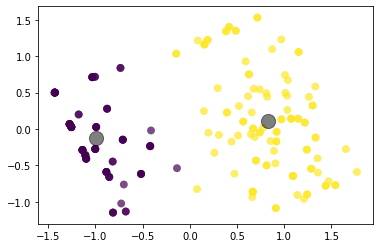

In [434]:

plt.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,cmap='viridis',c=kmeans.labels_)
                
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 13. Apply SVC model on train dataset and predict target for test dataset

### SVC

In [435]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn import metrics

### Running Vanilla SVC

In [436]:
model = SVC() 
model.fit(X_train_SVC, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Classification Report

In [437]:
# print prediction results 
predictions = model.predict(X_test_SVC) 
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### Confusion Matrix

In [454]:
print(metrics.confusion_matrix(Y_test, predictions))

[[16  0]
 [ 0 34]]


Accuracy , recall and F1 are all 100%. This could be because of duplicates in Train and Test data.

### Hyper Parameter tuning using GridSearchCV- Since it is computationally intensive, we will use only 3 hyperparameters.

In [455]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train_SVC, Y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] 

[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.975, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.975, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [456]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [457]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### Running SVC model with best grid hyper parameters.

In [458]:
model2 = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model2.fit(X_train_SVC, Y_train) 
  
# print prediction results 
predictions = model2.predict(X_test_SVC) 
print(classification_report(Y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### 14. Check accuracy and confusion matrix.

In [459]:
print(metrics.confusion_matrix(Y_test, predictions))

[[16  0]
 [ 0 34]]


#### All the metrics have values 100% as the classification has been done correclty for all the test data.

### Plotting Precision recall curves for this model

In [460]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

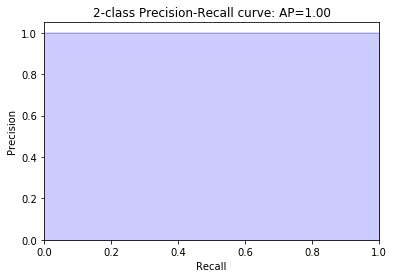

In [461]:
y_scores=model2.predict(X_test_SVC)
precision, recall, threshold = precision_recall_curve(Y_test, y_scores)
average_precision = average_precision_score(Y_test, y_scores)


precision, recall, _ = precision_recall_curve(Y_test, y_scores)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

#### Since the classification is correctly done for all the test data, the precision recall curve shows an area of 1.00 i.e. 100%

#### SVC classification on Train data and support vectors.

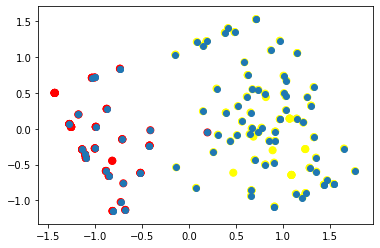

In [462]:
plt.scatter(X_train_SVC[:,0],X_train_SVC[:,1], c=Y_train,s=50,cmap='autumn')
plt.scatter(model2.support_vectors_[:,0],model2.support_vectors_[:,1])

#### SVC classification on Test data and support vectors.

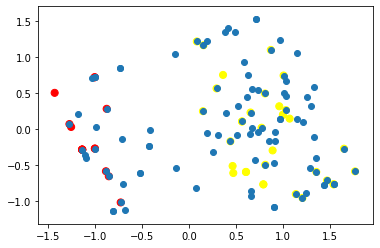

In [463]:
plt.scatter(X_test_SVC[:,0],X_test_SVC[:,1], c=Y_test,s=50,cmap='autumn')
plt.scatter(model2.support_vectors_[:,0],model2.support_vectors_[:,1])

### Hyper Parameter tuning using RandomizedSearchCV- we will use all hyper parameters

In [464]:
from sklearn.model_selection import RandomizedSearchCV

In [466]:
  parameters ={
    'C':            np.arange( 1, 100+1, 1 ).tolist(),
    'kernel':       ['linear', 'rbf'],                   # precomputed,'poly', 'sigmoid'
    'degree':       np.arange( 0, 100+0, 1 ).tolist(),
    'gamma':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'coef0':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'shrinking':    [True],
    'probability':  [False],
    'tol':          np.arange( 0.001, 0.01+0.001, 0.001 ).tolist(),
    'cache_size':   [2000],
    'class_weight': [None],
    'verbose':      [False],
    'max_iter':     [-1],
    'random_state': [7],
    }

model =RandomizedSearchCV( n_iter              = 500,
                                        estimator           = SVC(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        iid                 = True,
                                        refit               = True,
                                        cv                  = 5,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs'
                                        )         # scoring = 'accuracy'
model.fit( X_train_SVC, Y_train )
print( model.best_estimator_ )
print( model.best_score_ )
print( model.best_params_ )

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 688 tasks      | elapsed:    1.5s


SVC(C=51, break_ties=False, cache_size=2000, class_weight=None,
    coef0=3.4000000000000004, decision_function_shape='ovr', degree=29,
    gamma=0.8, kernel='rbf', max_iter=-1, probability=False, random_state=7,
    shrinking=True, tol=0.002, verbose=False)
0.995
{'verbose': False, 'tol': 0.002, 'shrinking': True, 'random_state': 7, 'probability': False, 'max_iter': -1, 'kernel': 'rbf', 'gamma': 0.8, 'degree': 29, 'coef0': 3.4000000000000004, 'class_weight': None, 'cache_size': 2000, 'C': 51}


[Parallel(n_jobs=4)]: Done 2500 out of 2500 | elapsed:    4.4s finished


### Randomized search CV method has the best estomator score of 0.995 which is 100%. Lets build a model with these parameters ands run SVC.

In [480]:
model3 = SVC(C=51, break_ties=False, cache_size=2000, class_weight=None,
    coef0=3.4000000000000004, decision_function_shape='ovr', degree=29,
    gamma=0.8, kernel='rbf', max_iter=-1, probability=False, random_state=7,
    shrinking=True, tol=0.002, verbose=False)
model3.fit(X_train_SVC, Y_train) 
  
# print prediction results 
predicted = model3.predict(X_test_SVC) 
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [481]:
print(metrics.confusion_matrix(Y_test, predicted))

[[16  0]
 [ 0 34]]


#### All scores and metrics are 100 % as there are no classification errors

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

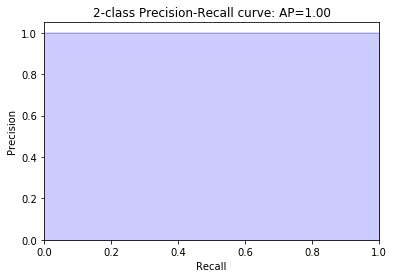

In [470]:
y_scores=model3.predict(X_test_SVC)
precision, recall, threshold = precision_recall_curve(Y_test, y_scores)
average_precision = average_precision_score(Y_test, y_scores)


precision, recall, _ = precision_recall_curve(Y_test, y_scores)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

#### The precision recall curve shows an area of 1.00 i.e. 100% just like Grid search CV model.

#### SVC classification on Train data and support vectors.

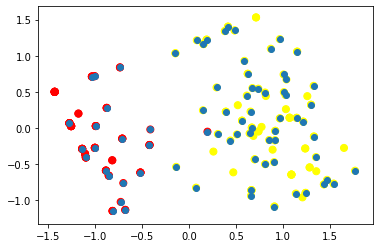

In [472]:
plt.scatter(X_train_SVC[:,0],X_train_SVC[:,1], c=Y_train,s=50,cmap='autumn')
plt.scatter(model3.support_vectors_[:,0],model3.support_vectors_[:,1])

#### SVC classification on Test data and support vectors.

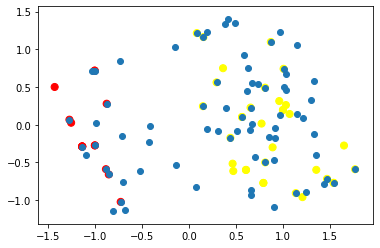

In [483]:
plt.scatter(X_test_SVC[:,0],X_test_SVC[:,1], c=Y_test,s=50,cmap='autumn')
plt.scatter(model3.support_vectors_[:,0],model3.support_vectors_[:,1])

### To know whether the models are overfitting, cross validation is needed.

In [112]:
from sklearn.model_selection import validation_curve

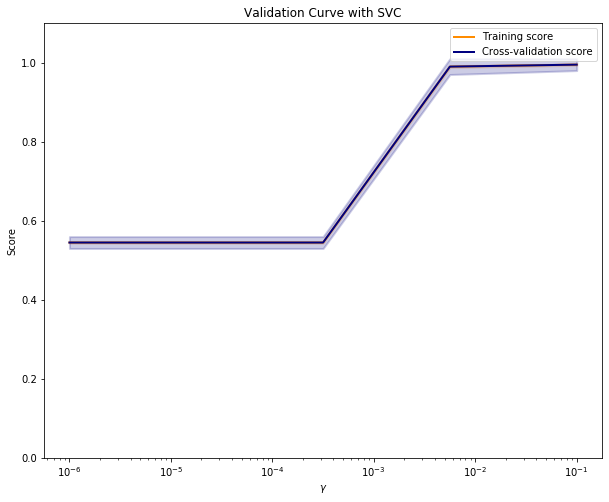

In [484]:
plt.figure(figsize=(10,8))
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X_train_SVC, Y_train, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=-1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### The train and test validation scores are overlapping as per the plot. The accuracy is very low for high Gamma value and increases as the Gamma value reduces.

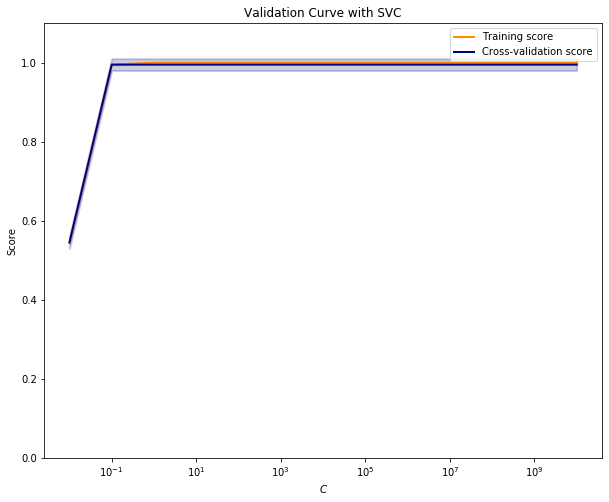

In [485]:
plt.figure(figsize=(10,8))
param_range = np.logspace(-2, 10, 13)
train_scores, test_scores = validation_curve(
    SVC(), X_train_SVC, Y_train, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=-1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### The training curve and validation curves overlap and the accuracy is gradually increasing with increase in 'C' value. Which means accuracy is getting higher with wider margins.

### Conclusion-> The SVC model will perform optimally when Gamma is low and C is high. Since the data is simple and have lot of duplicates, even vanilla SVM is giving 100% accuracy . This is not a case of overfitting but the data is straight forward and simple.